In [1]:
import os
import logging


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.INFO,
    format="[ %(levelname)s ] : %(asctime)s - %(name)s - %(message)s",
    force=True
)

logger.info("ADC for LIR8x8")

[ INFO ] : 2023-10-23 19:22:06,425 - __main__ - ADC for LIR8x8


In [2]:
# Read latest survey data and concatenate ISSCC and VLSI data
uri = "https://github.com/bmurmann/ADC-survey/blob/main/xls/ADCsurvey_latest.xlsx?raw=true"
df1 = pd.read_excel(uri, sheet_name='ISSCC')
df2 = pd.read_excel(uri, sheet_name='VLSI')
df = pd.concat([df1, df2])
df.head()

,YEAR,ID,TYPE,ARCHITECTURE,TECHNOLOGY,TITLE,ABSTRACT,AUTHORS,DOI,LINK,...,OSR,fsnyq [Hz],fcenter [Hz],P/fsnyq [pJ],FOMW_lf [fJ/conv-step],FOMW_hf [fJ/conv-step],FOMS_lf [dB],FOMS_hf [dB],FOMW_hf/fsnyq,"FOMS,hf+10log(fsnyq)"
0,1997,8.1,NQ,SAR,1,"A MOSFET-only, 10 b, 200 ksample/s A/D convert...",The linearity of a successive approximation (S...,"C. Hammerschmied, Q. Huang",10.1109/ISSCC.1997.585301,https://doi.org/10.1109/ISSCC.1997.585301,...,1.0,200000.0,NaN,60000.00,NaN,109339.803696,NaN,125.750188,0.546699,178.760487
1,1997,8.2,NQ,Folding,1.00 BiCMOS,A 12 b 50 M sample/s cascaded folding and inte...,The architecture of this 12 b ADC is based on ...,"P. Vorenkamp, R. Roovers",10.1109/ISSCC.1997.585303,https://doi.org/10.1109/ISSCC.1997.585303,...,1.0,50000000.0,NaN,6000.00,NaN,4632.774155,NaN,143.208188,0.000093,220.197888
2,1997,8.3,NQ,Folding,0.5,A 170 mW 10 b 50 Msample/s CMOS ADC in 1 mm²,This 10 b AD-converter at a sample rate of 5O ...,"K. Bult, A. Buchwald, J. Laskowski",10.1109/ISSCC.1997.585303,https://doi.org/10.1109/ISSCC.1997.585303,...,1.0,50000000.0,NaN,3400.00,NaN,8762.357220,NaN,135.206911,0.000175,212.196611
3,1997,8.4,NQ,Two-step,Bipolar,A 12 b 128 MSample/s ADC with 0.05 LSB DNL,This analog-to-digital converter uses integrat...,"R. Jewett, K. Poulton, K.-C. Hsieh, J. Doernberg",10.1109/ISSCC.1997.585305,https://doi.org/10.1109/ISSCC.1997.585305,...,1.0,128000000.0,NaN,44531.25,NaN,65521.324450,NaN,128.903051,0.000512,209.975151
4,1997,8.8,NQ,Pipe,1.4,A 15 b 5 MSample/s low-spurious CMOS ADC,This 15b CMOS ADC at 5MSample/s has four stage...,"S.-U. Kwak, B.-S. Song, K. Bacrania",10.1109/ISSCC.1997.585309,https://doi.org/10.1109/ISSCC.1997.585309,...,1.0,5000000.0,NaN,26000.00,NaN,1809.502089,NaN,157.739967,0.000362,224.729667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 0 to 265
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YEAR                    676 non-null    int64  
 1   ID                      676 non-null    object 
 2   TYPE                    676 non-null    object 
 3   ARCHITECTURE            676 non-null    object 
 4   TECHNOLOGY              676 non-null    object 
 5   TITLE                   676 non-null    object 
 6   ABSTRACT                676 non-null    object 
 7   AUTHORS                 676 non-null    object 
 8   DOI                     676 non-null    object 
 9   LINK                    676 non-null    object 
 10  COMMENTS                676 non-null    object 
 11  VSUP1 [V]               309 non-null    float64
 12  VSUP2 [V]               59 non-null     float64
 13  VSUP3 [V]               7 non-null      float64
 14  Csamp [pF]              471 non-null    object 

In [4]:
# # SNDR vs conversion rate- scatter plot
# sns.scatterplot(x='fs [Hz]', y='SNR [dB]', data=df)
# # sns.scatterplot(x='fs [Hz]', y='SNDR_lf [dB]', data=df)
# plt.show()

In [8]:
df_1g = df[df['fs [Hz]'] < 100e6]

In [21]:
# df_1g['P [W]'].describe()
df_1g['P/fsnyq [pJ]'].describe()

count    3.060000e+02
mean     3.276117e+07
std      5.716576e+08
min      1.900000e-01
25%      9.204464e+01
50%      1.086667e+03
75%      1.095000e+04
max      1.000000e+10
Name: P/fsnyq [pJ], dtype: float64

In [19]:
(df_1g['P [W]'] < 0).sum()

0

In [17]:
min_max_scaler('P [W]')

0      5.020919e-04
1      1.255230e-02
2      7.112971e-03
3      2.384937e-01
4      5.439330e-03
           ...     
261    7.196641e-05
262    3.598315e-05
263    4.141130e-07
264    4.351453e-05
265    5.020919e-04
Name: P [W], Length: 676, dtype: float64

In [12]:
standard_scaler = lambda col='P [W]': (df[col]- df[col].mean())/df[col].std()
min_max_scaler = lambda col: (df[col]-df[col].min())/(df[col].max()-df[col].min())

# min_max_scaler('P [W]')*1000
# s = standard_scaler()[standard_scaler() > 0]
s = standard_scaler()
s

0     -0.172155
1      0.064458
2     -0.042347
3      4.500949
4     -0.075210
         ...   
261   -0.180601
262   -0.181307
263   -0.182006
264   -0.181159
265   -0.172155
Name: P [W], Length: 676, dtype: float64

ValueError: s must be a scalar, or float array-like with the same size as x and y

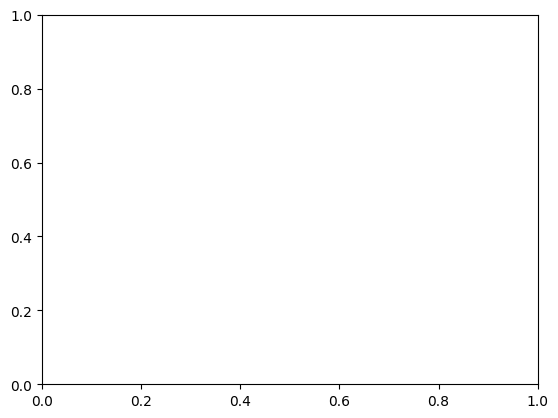

In [14]:
s = s.unique()
s = abs(s.min()) + s
plt.scatter(x=df_1g['fs [Hz]'], y=df_1g['SNR [dB]'], 
            s=s,
            # c='AREA [mm^2]'
            )
plt.show()

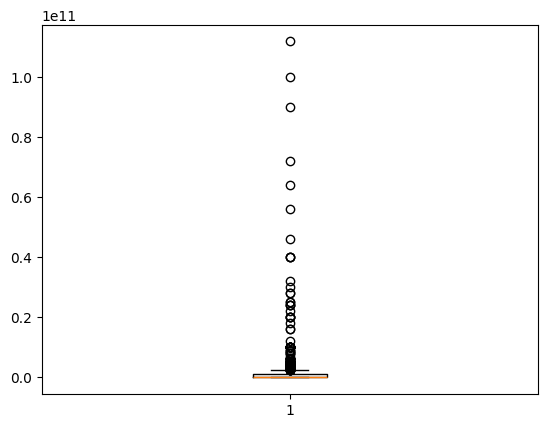

In [ ]:
plt.boxplot(df['fs [Hz]'])
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f07f2189f00>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f07f2189ed0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f07f218a5f0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f07f218a8f0>}

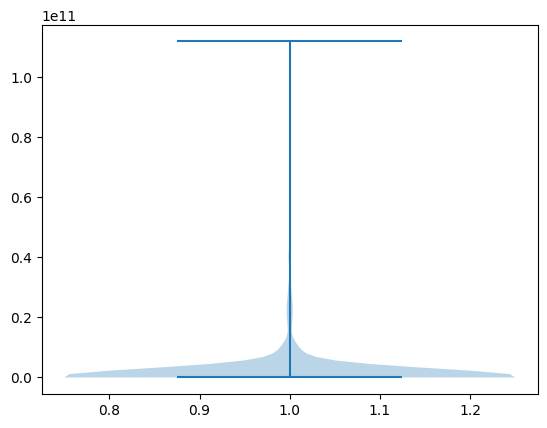

In [ ]:
plt.violinplot(df['fs [Hz]'])

(array([458.,  69.,  22.,  17.,  14.,   9.,   4.,  13.,  13.,   1.,   7.,
          2.,   0.,   1.,   3.,   2.,   1.,   9.,   3.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,
          0.,   0.,   4.,   0.,   0.,   0.,   1.,   0.,   0.,   3.,   0.,
          2.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

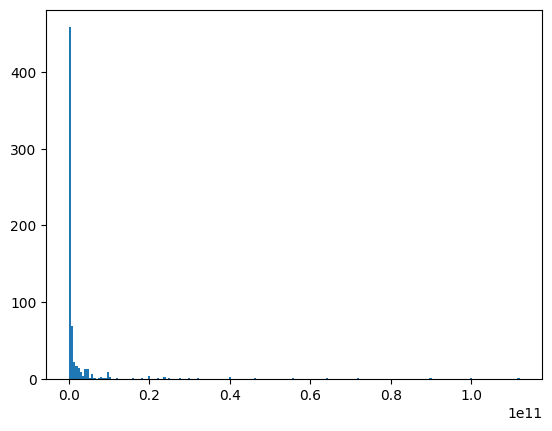

In [ ]:
plt.hist(df['fs [Hz]'], bins=200)

In [ ]:
from dataclass import dataclass